In [1]:
using QuantumCollocation
using NamedTrajectories
using TrajectoryIndexingUtils
using CairoMakie

In [2]:
RZ_dda_traj = load_traj("RZ_dda_trajectory.jld2")
RZ_U_traj = load_traj("RZ_U_trajectory.jld2")

# U2_traj = load_traj("U2_pretrained.jld2")
# ;

NamedTrajectory{Float64}([1.0 1.0 … 0.9999643756759288 0.9999901148697901; 0.0 -1.4599447545144926e-28 … 0.0013581288311795992 0.0024480224077554325; … ; 0.042632638463630905 0.0488219830373448 … -0.42239705731583616 0.0; -0.020498312351640922 0.027086504584382342 … 0.9991230724489097 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0  …  -0.0007765998998628875, -0.9999901120590394, 0.002947094840760326, 0.007800227138757238, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 51, 0.2, 154, (Ũ⃗1 = 8, a1 = 2, da1 = 2, dda1 = 2, Ũ⃗2 = 8, a2 = 2, da2 = 2, dda2 = 2, Ũ⃗3 = 8, a3 = 2, da3 = 2, dda3 = 2, Ũ⃗4 = 8, a4 = 2, da4 = 2, dda4 = 2, Ũ⃗5 = 8, a5 = 2, da5 = 2, dda5 = 2, Ũ⃗6 = 8, a6 = 2, da6 = 2, dda6 = 2, Ũ⃗7 = 8, a7 = 2, da7 = 2, dda7 = 2, Ũ⃗8 = 8, a8 = 2, da8 = 2, dda8 = 2, Ũ⃗9 = 8, a9 = 2, da9 = 2, dda9 = 2, Ũ⃗10 = 8, a10 = 2, da10 = 2, dda10 = 2, Ũ⃗11 = 8, a11 = 2, da11 = 2, dda11 = 2, states = 132, controls = 22), (a1 = ([-1.0, -1.0], [1.0, 1.0]), da1 = ([-Inf, -Inf], [Inf, Inf]), dda1 = ([-1.0, -1

In [3]:
const Units = 1e9
const MHz = 1e6 / Units
const GHz = 1e9 / Units
const ns = 1e-9 * Units
const μs = 1e-6 * Units
;

In [4]:
# Operators
const Paulis = Dict(
    "I" => Matrix{ComplexF64}([1 0; 0 1]),
    "X" => Matrix{ComplexF64}([0 1; 1 0]),
    "Y" => Matrix{ComplexF64}([0 im; -im 0]),
    "Z" => Matrix{ComplexF64}([1 0; 0 -1]),
)
const a = [0 1; 0 0]
const ad = transpose(a);
rz_op(theta) = exp(-im/2 * theta[1] * Paulis["Z"]);

RZ = Gate(1,rz_op)

u2_op(theta) = 1/sqrt(2) * [1 -exp(1im * theta[2]);exp(1im * theta[1]) exp(1im * (theta[1]+theta[2]))]

U2 = Gate(2,u2_op)
U2([1,2])

H_drives = [
     Paulis["X"],Paulis["Y"]
]
system = QuantumSystem(H_drives);
t_f = 10* ns
n_steps = 51
times = range(0, t_f, n_steps)  # Alternative: collect(0:Δt:t_f)
n_controls=1
n_qubits=1;
Δt = times[2] - times[1]

N = 11
;

In [16]:
RZ_dda_data = sample(RZ_dda_traj,RZ,Δt,system,100,N)
RZ_U_data = sample(RZ_U_traj,RZ,Δt,system,100,N)
RZ_dda_phase = phase_sample(RZ_dda_traj,RZ,Δt,system,100,N)
RZ_U_phase = phase_sample(RZ_U_traj,RZ,Δt,system,100,N)

;

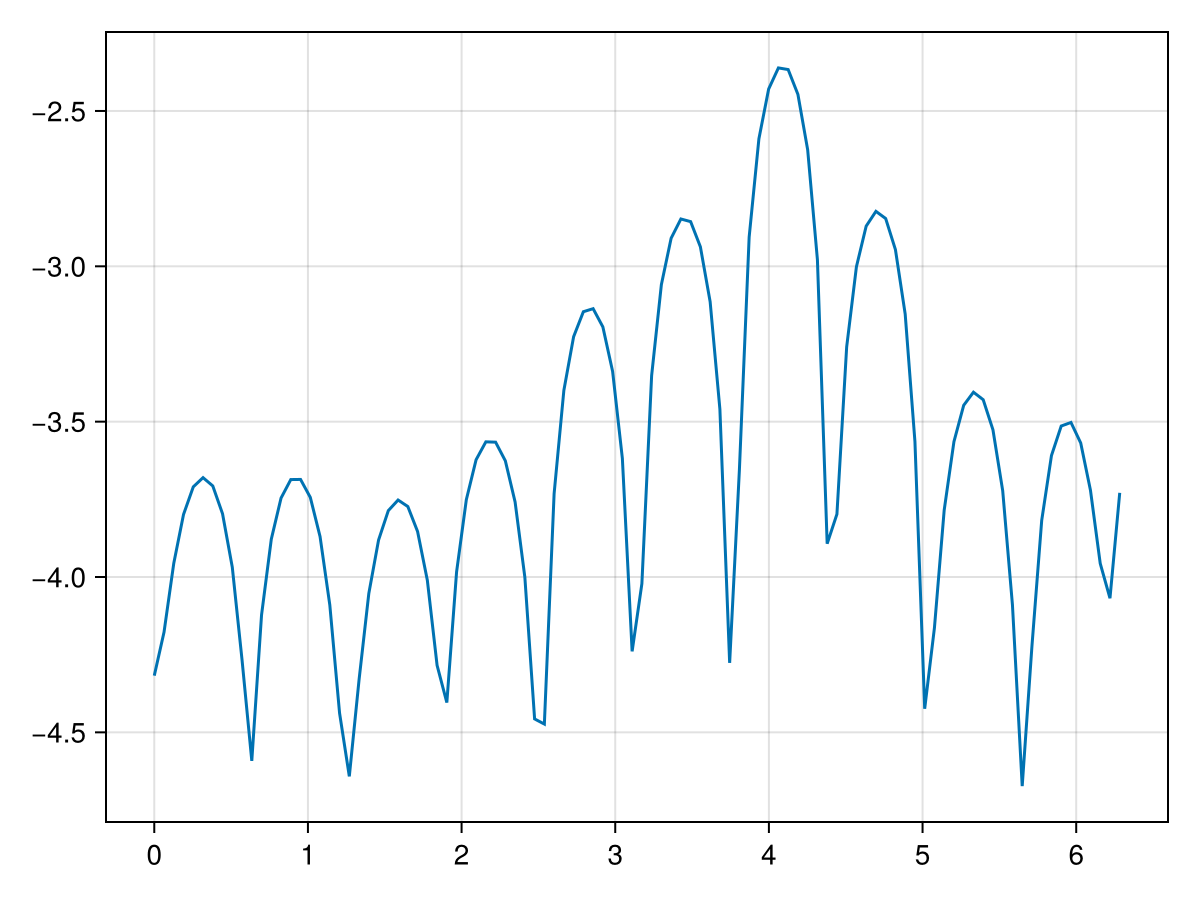

In [17]:
lines(range(0,2*pi,100),log10.(RZ_dda_data))

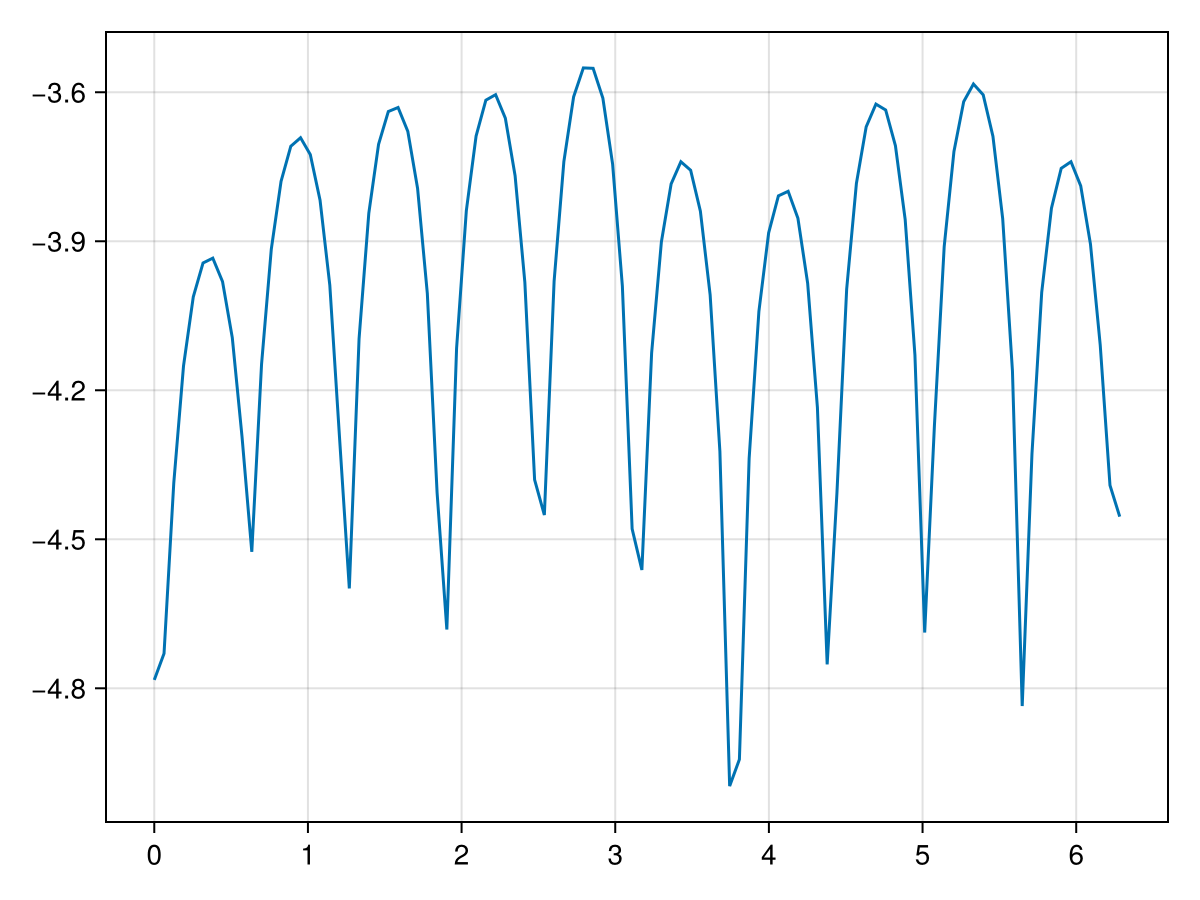

In [18]:
lines(range(0,2*pi,100),log10.(RZ_U_data))

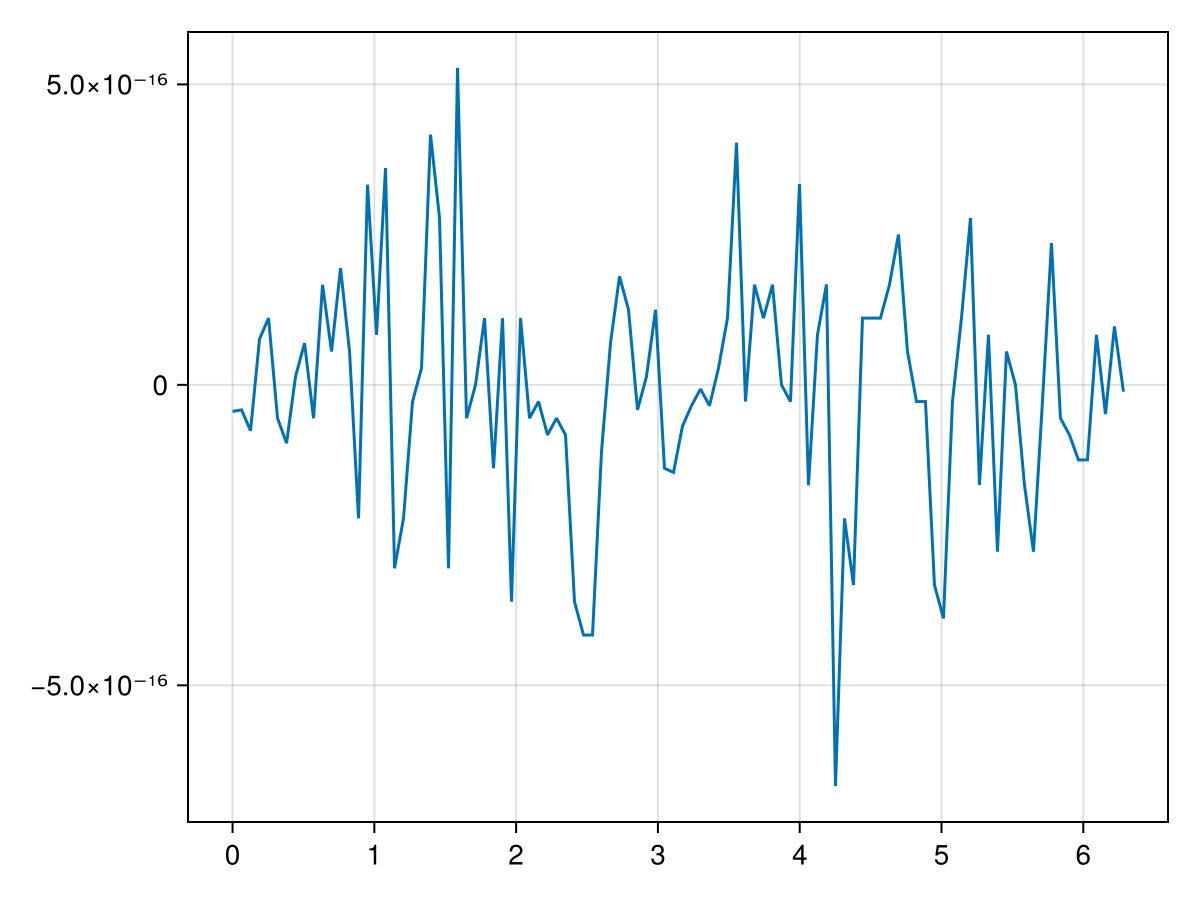

In [19]:
lines(range(0,2*pi,100),(RZ_dda_phase))

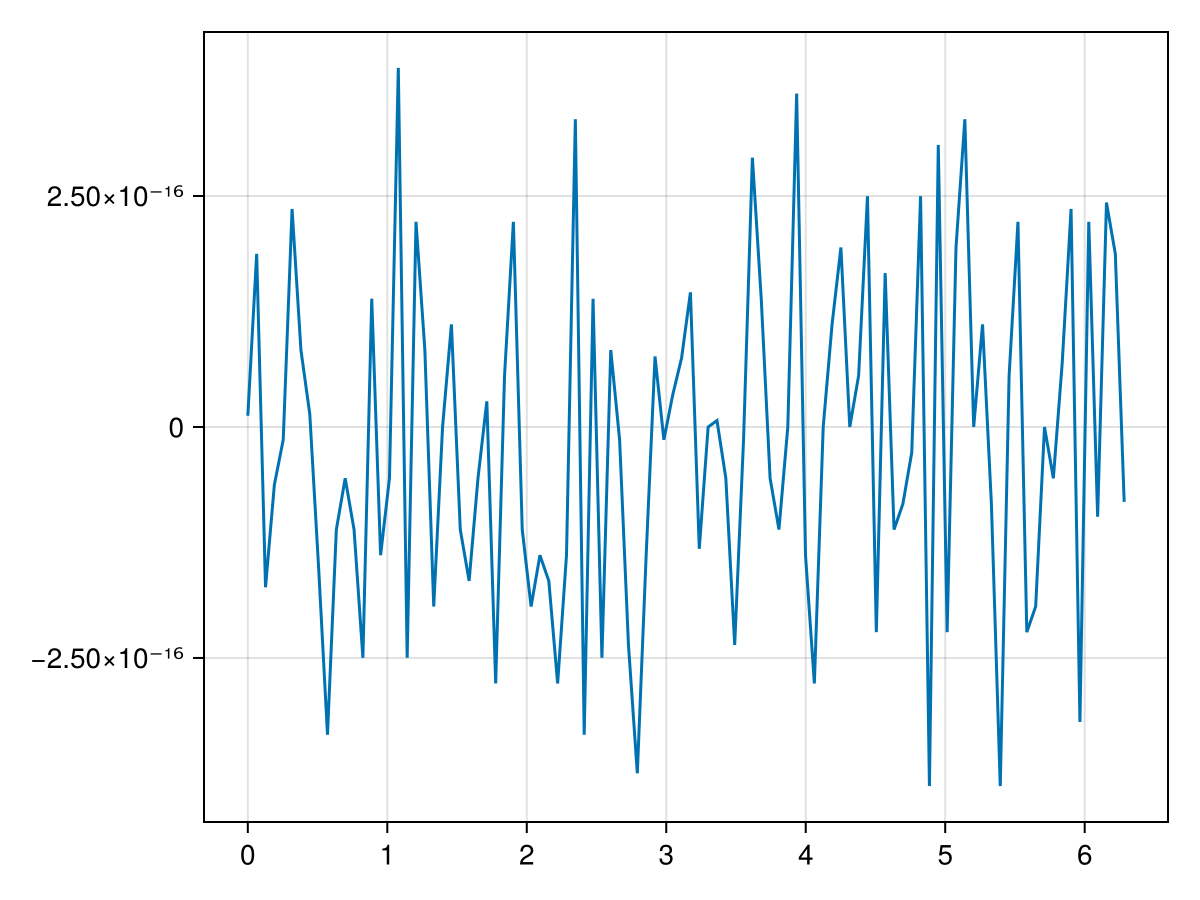

In [20]:
lines(range(0,2*pi,100),(RZ_U_phase))

In [10]:
fig, ax, hm = heatmap(range(0,2*pi,100),range(0,2*pi,100),log10.(U2_data),colormap=:inferno)
Colorbar(fig[:, end+1], hm)

fig

LoadError: UndefVarError: `U2_data` not defined

In [11]:
sum(log10.(RZ_data))/100

LoadError: UndefVarError: `RZ_data` not defined

In [12]:
sum(log10.(U2_data))/100^2

LoadError: UndefVarError: `U2_data` not defined

In [13]:
RZ_data = phase_sample(RZ_traj,RZ,Δt,system,100,N)
U2_data = phase_sample(U2_traj,U2,Δt,system,100,N)
;

LoadError: UndefVarError: `RZ_traj` not defined

In [14]:
lines(range(0,2*pi,100),(RZ_data))

LoadError: UndefVarError: `RZ_data` not defined

In [15]:
fig, ax, hm = heatmap(range(0,2*pi,100),range(0,2*pi,100),(U2_data),colormap=:inferno)
Colorbar(fig[:, end+1], hm)

fig

LoadError: UndefVarError: `U2_data` not defined